### Nous allons reprendre le pipeline de classification avec des données sélectionnées avec clustering: articles_selectionnes_umap_et_kmeans.csv

Dans ce fichier, nous avons :
- supprimé les articles avec les caractères incompréhensibles,  
- Remplacé les NAN de title par des chaines vides 
- Supprimé les doublons
- Supprimé les noms des maladies 

In [2]:
import pandas as pd 

# Comme nous avions remplacé les titres NAN par des chaines vides, à la sauvegarde ces titres sont
# encore remplacés par des NAN il parait, du coup pour éviter cela nous utilisons l'argument keep_default_na qu'on 
# met à False 
data = pd.read_csv("articles_selectionnes_umap_et_kmeans.csv", keep_default_na=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24504 entries, 0 to 24503
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           24504 non-null  object
 1   text            24504 non-null  object
 2   Thematique      24504 non-null  object
 3   Maladie         24504 non-null  object
 4   text_sans_html  24504 non-null  object
 5   texte_concat    24504 non-null  object
 6   clean_text      24504 non-null  object
 7   x               24504 non-null  object
 8   y               24504 non-null  object
 9   z               24504 non-null  object
 10  cluster         24504 non-null  object
 11  dist            24504 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


In [3]:
data.head()

,title,text,Thematique,Maladie,text_sans_html,texte_concat,clean_text,x,y,z,cluster,dist
0,Bani Suef emergency in preparation for spring ...,Bani Suef emergency in preparation for spring ...,SA,Foot And Mouth Disease,Bani Suef emergency in preparation for spring ...,Bani Suef emergency in preparation for spring ...,Bani Suef emergency in preparation for spring ...,8.586625,0.90834975,1.9334748,0.0,
1,Preventive vaccination campaign against foot-a...,Preventive vaccination campaign against foot-a...,SA,Foot And Mouth Disease,Preventive vaccination campaign against foot-a...,Preventive vaccination campaign against foot-a...,Preventive vaccination campaign against foot-a...,8.59744,0.9354461,1.9683397,0.0,
2,Janati: The herd's condition is good. And Onsa...,Janati: The herd's condition is good. And Onsa...,SA,Foot And Mouth Disease,Janati: The herd's condition is good. And Onsa...,Janati: The herd's condition is good. And Onsa...,Janati: The herd's condition is good. And Onsa...,8.555155,0.8796335,1.8682507,0.0,
3,As Eid al-Adha approaches. Onsa manager reveal...,2020-07-21\n\nIn Arabic LeSiteinfo - Wadih Taw...,SA,Foot And Mouth Disease,2020-07-21\n\nIn Arabic LeSiteinfo - Wadih Taw...,As Eid al-Adha approaches. Onsa manager reveal...,As Eid al-Adha approaches. Onsa manager reveal...,8.442227,0.91580725,1.9942162,0.0,
4,Intensive clean-up campaigns in assiut neighbo...,Asyut governorate witnessed the continuation o...,SA,Foot And Mouth Disease,Asyut governorate witnessed the continuation o...,Intensive clean-up campaigns in assiut neighbo...,Intensive clean-up campaigns in assiut neighbo...,8.603223,0.97353184,1.88303,0.0,


In [4]:
data = data[["title", "text", "clean_text", "Thematique"]]

In [5]:
data.head()

,title,text,clean_text,Thematique
0,Bani Suef emergency in preparation for spring ...,Bani Suef emergency in preparation for spring ...,Bani Suef emergency in preparation for spring ...,SA
1,Preventive vaccination campaign against foot-a...,Preventive vaccination campaign against foot-a...,Preventive vaccination campaign against foot-a...,SA
2,Janati: The herd's condition is good. And Onsa...,Janati: The herd's condition is good. And Onsa...,Janati: The herd's condition is good. And Onsa...,SA
3,As Eid al-Adha approaches. Onsa manager reveal...,2020-07-21\n\nIn Arabic LeSiteinfo - Wadih Taw...,As Eid al-Adha approaches. Onsa manager reveal...,SA
4,Intensive clean-up campaigns in assiut neighbo...,Asyut governorate witnessed the continuation o...,Intensive clean-up campaigns in assiut neighbo...,SA


In [2]:
data["Thematique"].value_counts()

Thematique
SA    8168
SP    8168
SV    8168
Name: count, dtype: int64

### Classification 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Texte nettoyé
X = data["clean_text"]

# 2. Labels encodés
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Thematique"])

# 3. Division en train / validation / test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # 70% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # 15% val, 15% test

# 4. Pipeline : TF-IDF + Random Forest
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# 5. Entraînement sur le train
pipeline.fit(X_train, y_train)

# 6. Évaluation sur le val
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          SA       0.99      0.97      0.98      1225
          SP       0.97      0.99      0.98      1225
          SV       0.99      0.99      0.99      1226

    accuracy                           0.98      3676
   macro avg       0.98      0.98      0.98      3676
weighted avg       0.98      0.98      0.98      3676



In [4]:
# 6. Évaluation sur le test
y_pred = pipeline.predict(X_test)
print("Evaluation sur les données de test")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Evaluation sur les données de test
              precision    recall  f1-score   support

          SA       0.98      0.96      0.97      1225
          SP       0.97      0.98      0.98      1226
          SV       0.98      0.99      0.99      1225

    accuracy                           0.98      3676
   macro avg       0.98      0.98      0.98      3676
weighted avg       0.98      0.98      0.98      3676



### Calcul de l'auc

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Prédire les probabilités pour la première classe comme nous en avaons 2
y_proba = pipeline.predict_proba(X_test)


# Étape 3 : calcul de l’AUC (one-vs-rest)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

print(f"AUC (macro-averaged, ovr): {auc:.4f}")


AUC (macro-averaged, ovr): 0.9969


#### Visualisons la répartion des maladies dans les ensembles train, validation et test maintenant pour voir 

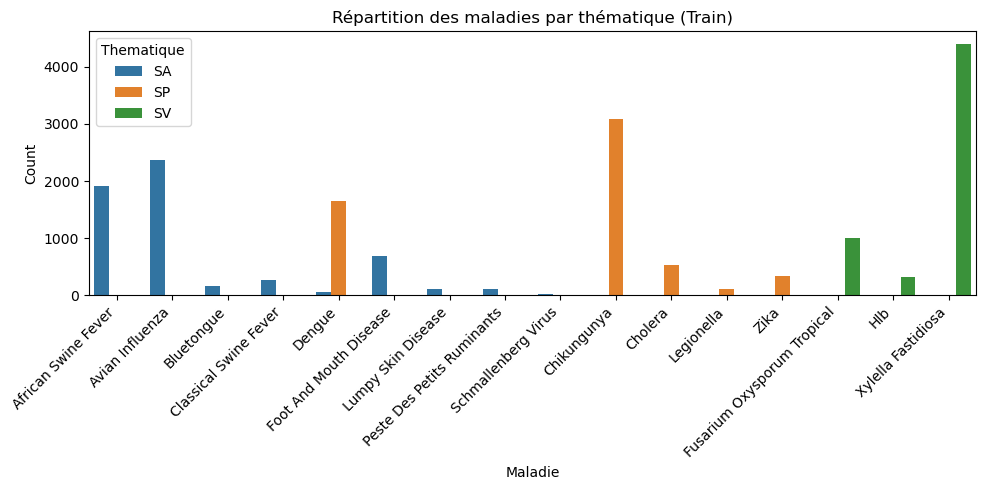

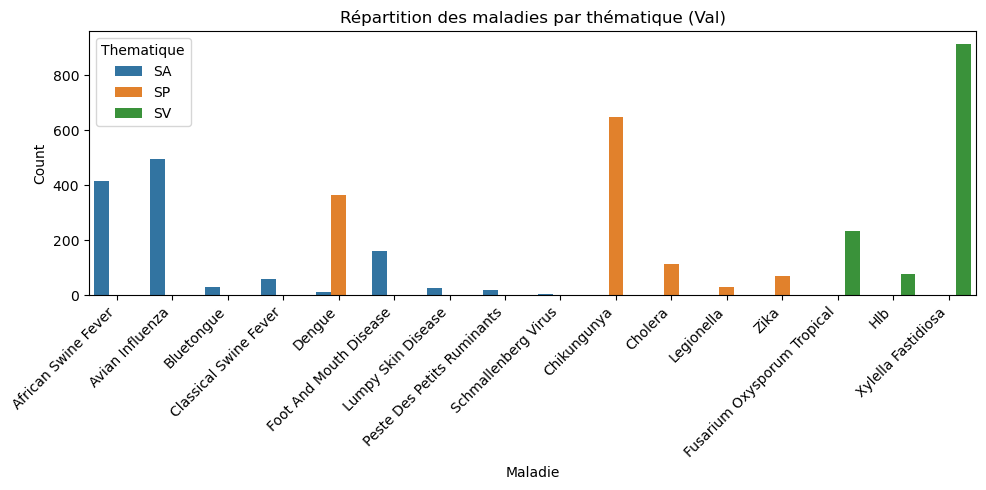

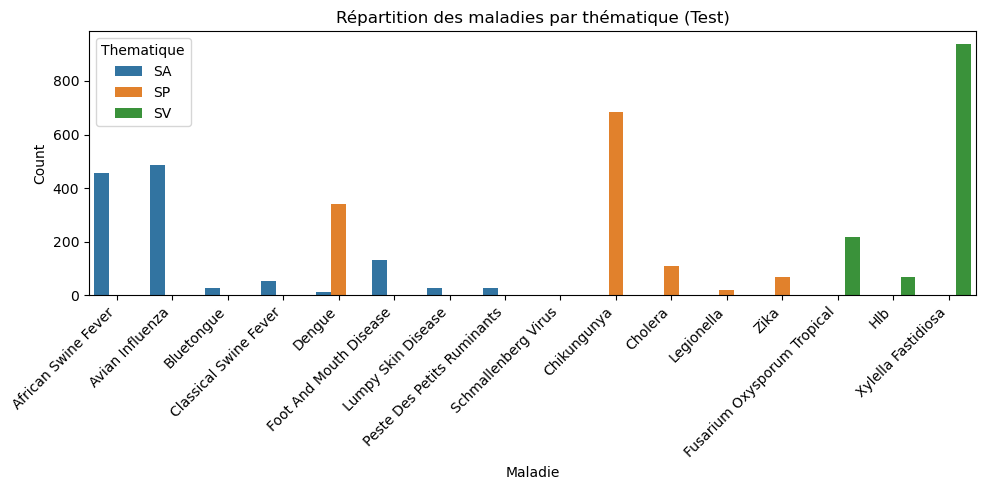

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la colonne Set pour savoir dans quel split chaque article tombe
data_final_split = data.copy()
data_final_split["Set"] = "Train"
data_final_split.loc[X_val.index, "Set"] = "Val"
data_final_split.loc[X_test.index, "Set"] = "Test"

# Grouper par Set, Thematique et Maladie
grouped = data_final_split.groupby(["Set", "Thematique", "Maladie"]).size().reset_index(name="Count")

# On affiche un histogramme pour chaque ensemble (train, val, test)
for split in ["Train", "Val", "Test"]:
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped["Set"] == split]
    
    sns.barplot(data=subset, x="Maladie", y="Count", hue="Thematique")
    plt.title(f"Répartition des maladies par thématique ({split})")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


### Sauvegarde de ce premier modèle 

In [7]:
import joblib

# Sauvegarde du pipeline complet
joblib.dump(pipeline, 'modele_thematique_umap&kmeans.pkl')


['modele_thematique_umap&kmeans.pkl']

In [12]:
import joblib

# Chargement du modèle 
pipeline = joblib.load('modele_thematique_umap&kmeans.pkl')

# Texte à prédire
texte = ["A new disease affecting animals was discovered this year."]

# Prédiction
pred = pipeline.predict(texte)
pred_label = label_encoder.inverse_transform(pred)[0]

# Probabilités associées
probas = pipeline.predict_proba(texte)[0]  # tableau 1D des proba pour chaque classe

# Affichage
print(f"Texte : {texte[0]}")
print(f"Thématique prédite : {pred_label}")
print("Probabilités par classe :")
for i, p in enumerate(probas):
    print(f"  {label_encoder.classes_[i]} : {p:.4f}")


Texte : A new disease affecting animals was discovered this year.
Thématique prédite : SV
Probabilités par classe :
  SA : 0.4350
  SP : 0.0400
  SV : 0.5250


### Commentaire

Cette prédiction n'est pas correcte bien que la proba pour SA semble vouloir se prononcer, nous concluons que le modèle TF-IDF semble être statique(il plante sur les mots qu'il n'a pas connu, il supprime d'ailleur ces mots)

### Affichons les matrices de confusion pour les prédictions de ce modèle sur les données de validation et celles de test

<Figure size 800x600 with 0 Axes>

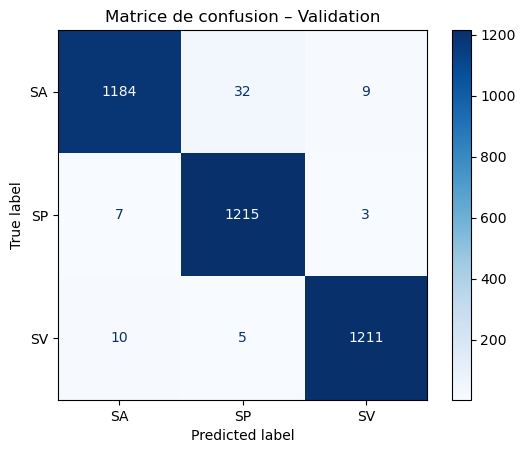

<Figure size 800x600 with 0 Axes>

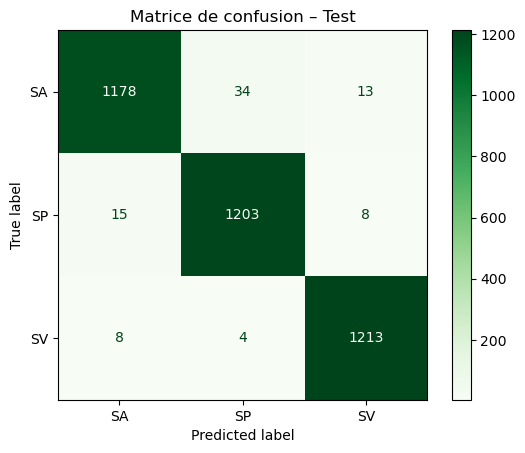

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === PRÉDICTIONS ===
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

# === MATRICE DE CONFUSION VALIDATION ===
cm_val = confusion_matrix(y_val, y_pred_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_val.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – Validation")
plt.show()

# === MATRICE DE CONFUSION TEST ===
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Greens', values_format='d')
plt.title("Matrice de confusion – Test")
plt.show()


### Appliquons la vectorisation avec SBERT et puis la classification avec Random Forest 

In [13]:
## Vectorisation sbert, nous utilisons la version légère qui a d'ailleur donné de bon résultats

from sentence_transformers import SentenceTransformer

sbert_model = SentenceTransformer("all-MiniLM-L6-v2")  
texts = data["clean_text"]

X_sbert = sbert_model.encode(texts, show_progress_bar=True)

W0718 11:18:26.720000 424 torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
C:\Users\stginrae.AFRIQUE-TP02\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/766 [00:00<?, ?it/s]

In [27]:

# Entraînement d’un RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encodage des labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Thematique"])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_sbert, y, test_size=0.2, random_state=42, stratify=y)

# RandomForest
clf = RandomForestClassifier(n_estimators=400, random_state=42) # Plusieurs valeurs de n_estimators testées, ceci semble mieux fonctionner 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Rapport
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          SA       0.98      0.95      0.96      1633
          SP       0.96      0.98      0.97      1634
          SV       0.97      0.99      0.98      1634

    accuracy                           0.97      4901
   macro avg       0.97      0.97      0.97      4901
weighted avg       0.97      0.97      0.97      4901



#### Calcul de l'auc

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Prédire les probabilités pour la première classe comme nous en avaons 2
y_proba = clf.predict_proba(X_test)


# Étape 3 : calcul de l’AUC (one-vs-rest)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

print(f"AUC (macro-averaged, ovr): {auc:.4f}")


AUC (macro-averaged, ovr): 0.9961


### Matrice de confusion pour ce modèle sur les données de test comme nous avons juste fait deux séparations ici 

<Figure size 800x600 with 0 Axes>

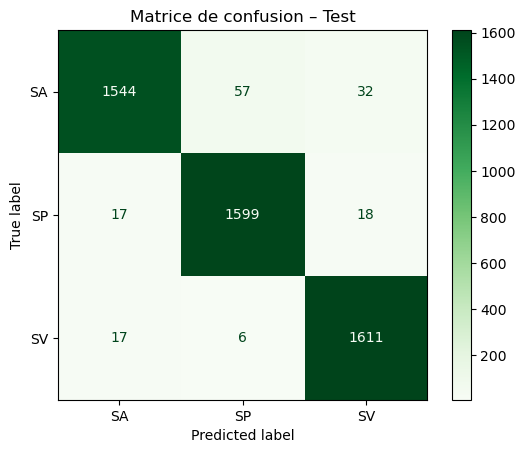

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === PRÉDICTIONS ===
y_pred_test = clf.predict(X_test)


# === MATRICE DE CONFUSION TEST ===
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Greens', values_format='d')
plt.title("Matrice de confusion – Test")
plt.show()


#### Sauvegarde du modèle 

In [29]:
import joblib

# Sauvegarde du model 
joblib.dump(clf, 'modele_thematique_SBERT_umap&kmeans.pkl')


['modele_thematique_SBERT_umap&kmeans.pkl']

#### Exemple de prédiction sur une phrase 

In [30]:
from sentence_transformers import SentenceTransformer
import joblib

# 1. Charger le modèle SBERT qu'on a utilisé à l'entrainement 
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')  # ou le modèle que tu avais utilisé

# 2. Charger le modèle de classification
model = joblib.load('modele_thematique_SBERT_umap&kmeans.pkl')

# 3. Texte à prédire
texte = ["A new disease affecting animals was discovered this year"]

# 4. Vectorisation avec SBERT
texte_vect = sbert_model.encode(texte)

# 5. Prédiction
pred = model.predict(texte_vect)
pred_label = label_encoder.inverse_transform(pred)[0]

# 6. Probabilités associées
probas = model.predict_proba(texte_vect)[0]

# 7. Affichage
print("Prédiction avec le modèle SBERT+RandomForest sur la première version des données")
print(f"Texte : {texte[0]}")
print(f"Thématique prédite : {pred_label}")
print("Probabilités par classe :")
for i, p in enumerate(probas):
    print(f"  {label_encoder.classes_[i]} : {p:.4f}")


C:\Users\stginrae.AFRIQUE-TP02\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Prédiction avec le modèle SBERT+RandomForest sur la première version des données
Texte : A new disease affecting animals was discovered this year
Thématique prédite : SA
Probabilités par classe :
  SA : 0.6850
  SP : 0.1900
  SV : 0.1250


### Apprentissage par transfert

Essayons maintenant de faire avec ce jeu de données un envoie des embeddings de sbert à un perceptron multicouche puis évaluons la courbe d'apprentissage et la courbe ROC 

In [31]:
### Les librairies 
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sentence_transformers import SentenceTransformer
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import classification_report
%load_ext memory_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [62]:
# Créer une colonne combinée titre + texte
data["titre_texte"] = data["title"].fillna('') + " " + data["text"].fillna('')

# Détection des doublons sur cette combinaison
doublons_combines = data.duplicated(subset=["titre_texte"])
print(f"Doublons sur la combinaison titre + texte : {doublons_combines.sum()}")


Doublons sur la combinaison titre + texte : 0


1. Préparation des données 

In [63]:
texts = data["clean_text"].astype(str).tolist()
labels = data["Thematique"].astype(str)

2. Encodage des labels 

In [64]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

3. Split des données en 3 

In [65]:
X_train, X_temp, y_train, y_temp = train_test_split(
    texts, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=42
)

4. Vectorisation avec SBERT, nous allons utiliser la version légère de SBERT qui fonctionne bien 

In [66]:
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_embed = sbert_model.encode(X_train, convert_to_tensor=True, show_progress_bar=True)
X_val_embed = sbert_model.encode(X_val, convert_to_tensor=True, show_progress_bar=True)
X_test_embed = sbert_model.encode(X_test, convert_to_tensor=True, show_progress_bar=True)


C:\Users\stginrae.AFRIQUE-TP02\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/536 [00:00<?, ?it/s]

Batches:   0%|          | 0/161 [00:00<?, ?it/s]

Batches:   0%|          | 0/69 [00:00<?, ?it/s]

5. Transformation des données sous forme de tenseur

In [67]:
train_dataset = TensorDataset(X_train_embed, torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(X_val_embed, torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(X_test_embed, torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

6. Définition du modèle 

Nous construisons le peceptron qu'on va utiliser, nous définissons l'optimiseur pour ajuster les poids du modèle qui va contribuer à réduire la perte, ainsi que la fonction de perte

Adam a été choisi car il adapte automatiquement le taux d'apprentissage pour chaque paramètre, il est adaptatif, combinant les avantages de RMSProp et momentum. Nous décidons avec model.parameters() que notre optimiseur doit avoir accès tous les paramètres (poids + biais) du modèle pour les mettre à jour pendant l'enttrainement 

In [68]:
class SBERTClassifier(nn.Module):
    def __init__(self, embedding_dim, num_classes):
        super(SBERTClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SBERTClassifier(X_train_embed.shape[1], len(label_encoder.classes_)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

7. Entrainement 

In [69]:
import numpy as np
import torch

save_path = "best_sbert_model_umap&kmeans.pt"
best_val_loss = np.inf
patience = 5
patience_counter = 0

history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": [], "train_f1": [], "val_f1": []}
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    y_true_train, y_pred_train, train_loss = [], [], 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        y_true_train.extend(y_batch.cpu().numpy())
        y_pred_train.extend(preds.cpu().numpy())

    train_loss /= len(train_loader)
    train_acc = accuracy_score(y_true_train, y_pred_train)
    train_f1 = f1_score(y_true_train, y_pred_train, average='macro')

    # Validation
    model.eval()
    y_true_val, y_pred_val, val_loss = [], [], 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            y_true_val.extend(y_batch.cpu().numpy())
            y_pred_val.extend(preds.cpu().numpy())

    val_loss /= len(val_loader)
    val_acc = accuracy_score(y_true_val, y_pred_val)
    val_f1 = f1_score(y_true_val, y_pred_val, average='macro')

    # Stockage
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)
    history["train_f1"].append(train_f1)
    history["val_f1"].append(val_f1)

    print(f"[{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Train F1: {train_f1:.4f} | Val F1: {val_f1:.4f}")

    # Sauvegarde du meilleur modèle
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), save_path)
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping déclenché.")
            break

# Rechargement du meilleur modèle
model.load_state_dict(torch.load(save_path))
print("Meilleur modèle chargé (val_loss minimum :", round(best_val_loss, 4), ")")


[1/100] Train Loss: 0.7393 | Val Loss: 0.3697 | Train Acc: 0.8544 | Val Acc: 0.9516 | Train F1: 0.8548 | Val F1: 0.9515
[2/100] Train Loss: 0.2489 | Val Loss: 0.1798 | Train Acc: 0.9556 | Val Acc: 0.9576 | Train F1: 0.9556 | Val F1: 0.9576
[3/100] Train Loss: 0.1567 | Val Loss: 0.1386 | Train Acc: 0.9599 | Val Acc: 0.9607 | Train F1: 0.9599 | Val F1: 0.9607
[4/100] Train Loss: 0.1323 | Val Loss: 0.1226 | Train Acc: 0.9620 | Val Acc: 0.9640 | Train F1: 0.9620 | Val F1: 0.9640
[5/100] Train Loss: 0.1195 | Val Loss: 0.1140 | Train Acc: 0.9640 | Val Acc: 0.9639 | Train F1: 0.9640 | Val F1: 0.9638
[6/100] Train Loss: 0.1118 | Val Loss: 0.1087 | Train Acc: 0.9662 | Val Acc: 0.9646 | Train F1: 0.9662 | Val F1: 0.9646
[7/100] Train Loss: 0.1058 | Val Loss: 0.1046 | Train Acc: 0.9672 | Val Acc: 0.9652 | Train F1: 0.9672 | Val F1: 0.9652
[8/100] Train Loss: 0.1020 | Val Loss: 0.1015 | Train Acc: 0.9682 | Val Acc: 0.9674 | Train F1: 0.9682 | Val F1: 0.9673
[9/100] Train Loss: 0.1000 | Val Loss: 0

8. Courbe d'apprentissage 

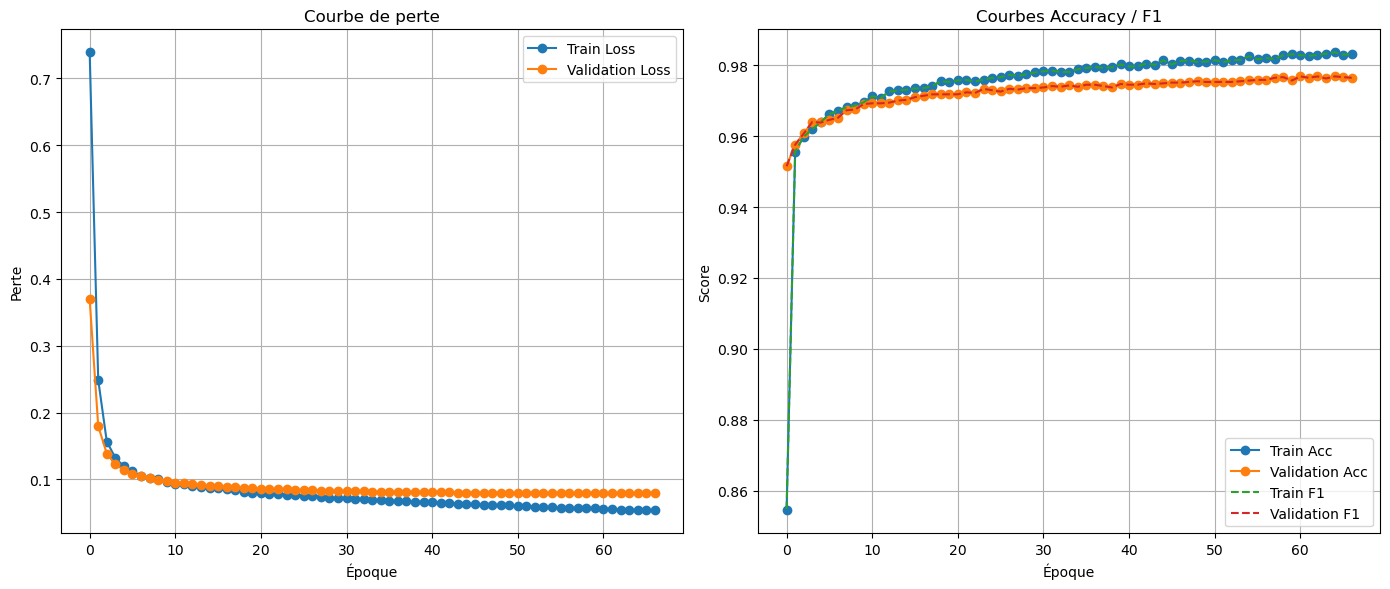

In [70]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="Train Loss", marker="o")
plt.plot(history["val_loss"], label="Validation Loss", marker="o")
plt.title("Courbe de perte")
plt.xlabel("Époque")
plt.ylabel("Perte")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history["train_acc"], label="Train Acc", marker="o")
plt.plot(history["val_acc"], label="Validation Acc", marker="o")
plt.plot(history["train_f1"], label="Train F1", linestyle="--")
plt.plot(history["val_f1"], label="Validation F1", linestyle="--")
plt.title("Courbes Accuracy / F1")
plt.xlabel("Époque")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### L'apprentissage est plustôt bon

9. Evaluation finale sur les données de test 

In [71]:
model.eval()
y_test_true, y_test_pred = [], []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        outputs = model(x_batch)
        preds = torch.argmax(outputs, dim=1)
        y_test_true.extend(y_batch.numpy())
        y_test_pred.extend(preds.cpu().numpy())

test_acc = accuracy_score(y_test_true, y_test_pred)
test_f1 = f1_score(y_test_true, y_test_pred, average='macro')
print("\nÉvaluation finale sur les données de test")
print("Accuracy :", round(test_acc, 4))
print("Macro F1 :", round(test_f1, 4))
print("\nClassification Report :")
print(classification_report(y_test_true, y_test_pred, target_names=label_encoder.classes_))


Évaluation finale sur les données de test
Accuracy : 0.9642
Macro F1 : 0.9641

Classification Report :
              precision    recall  f1-score   support

          SA       0.96      0.94      0.95       735
          SP       0.96      0.97      0.97       736
          SV       0.97      0.98      0.97       735

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206



### Pour faire des prédictions avec les nouvelles phrases pour ce modèle, nous allons: 
- Recréer exactement le même modèle 
- Préparer la phrase d'entrée
- Faire la prédiction 

In [72]:
import torch
import torch.nn as nn

class SBERTClassifier(nn.Module):
    def __init__(self, embedding_dim, num_classes):
        super(SBERTClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)


# Recréer le modèle avec les bons paramètres
input_dim = 384  # SBERT 'all-MiniLM-L6-v2' size
num_classes = 3  
model = SBERTClassifier(input_dim, num_classes)
model.load_state_dict(torch.load("best_sbert_model_umap&kmeans.pt"))
model.eval()


SBERTClassifier(
  (classifier): Sequential(
    (0): Linear(in_features=384, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [73]:
# Chargeons le modèle SBERT utilisé
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

def predict_thematique(text):
    # Encode le texte avec SBERT
    embedding = sbert_model.encode([text], convert_to_tensor=True)
    
    # Prédiction
    with torch.no_grad():
        logits = model(embedding)
        probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
        pred_idx = np.argmax(probs)
        confidence = probs[pred_idx]
        predicted_label = label_encoder.inverse_transform([pred_idx])[0]
    
    # Résultat
    print(f"Texte : {text}")
    print(f"Thématique prédite : {predicted_label}")
    print(f"Score de confiance : {confidence:.4f}")
    print("\nProbabilités par classe :")
    for idx, prob in enumerate(probs):
        label = label_encoder.inverse_transform([idx])[0]
        print(f"  {label} : {prob:.4f}")
    
    return predicted_label, confidence


C:\Users\stginrae.AFRIQUE-TP02\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [74]:
predict_thematique("A new disease affecting animals was discovered this year")

Texte : A new disease affecting animals was discovered this year
Thématique prédite : SA
Score de confiance : 0.9870

Probabilités par classe :
  SA : 0.9870
  SP : 0.0102
  SV : 0.0028


('SA', 0.98700964)

### Matrice de confusion 

afin de mieux visualiser comment le modèle fait ses prédictions 

<Figure size 800x600 with 0 Axes>

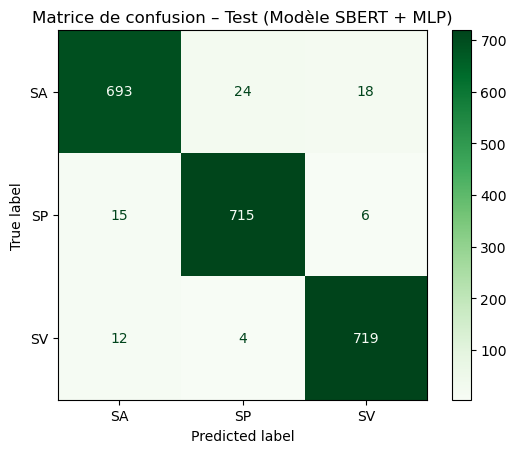

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === MATRICE DE CONFUSION TEST POUR LE MODÈLE PyTorch ===
cm_test = confusion_matrix(y_test_true, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Greens', values_format='d')
plt.title("Matrice de confusion – Test (Modèle SBERT + MLP)")
plt.show()


In [76]:
model.eval()
y_val_true, y_val_pred = [], []

with torch.no_grad():
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device)
        outputs = model(x_batch)
        preds = torch.argmax(outputs, dim=1)
        y_val_true.extend(y_batch.numpy())
        y_val_pred.extend(preds.cpu().numpy())

val_acc = accuracy_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred, average='macro')
print("\nÉvaluation finale sur les données de validation")
print("Accuracy :", round(val_acc, 4)) 
print("Macro F1 :", round(val_f1, 4))
print("\nClassification Report :")
print(classification_report(y_val_true, y_val_pred, target_names=label_encoder.classes_))


Évaluation finale sur les données de validation
Accuracy : 0.9765
Macro F1 : 0.9765

Classification Report :
              precision    recall  f1-score   support

          SA       0.98      0.96      0.97      1715
          SP       0.97      0.98      0.98      1715
          SV       0.98      0.98      0.98      1716

    accuracy                           0.98      5146
   macro avg       0.98      0.98      0.98      5146
weighted avg       0.98      0.98      0.98      5146



<Figure size 800x600 with 0 Axes>

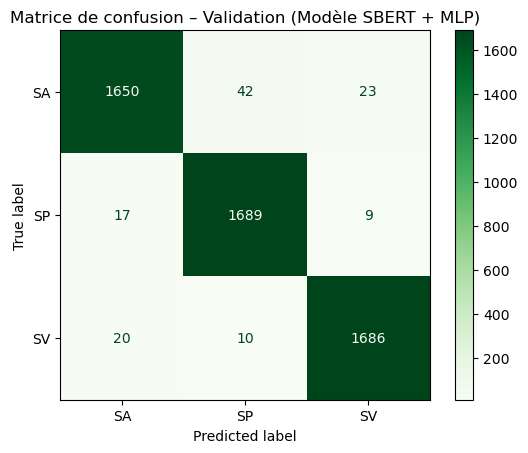

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === MATRICE DE CONFUSION TEST POUR LE MODÈLE PyTorch ===
cm_test = confusion_matrix(y_val_true, y_val_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Greens', values_format='d')
plt.title("Matrice de confusion – Validation (Modèle SBERT + MLP)")
plt.show()


val_dataset et test_dataset 

### Calcul de l'auc et affichage de la courbe ROC 

In [51]:
model.eval()
y_true, y_probs = [], []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        logits = model(x_batch)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
        y_probs.extend(probs)
        y_true.extend(y_batch.numpy())

y_probs = np.array(y_probs)
y_true = np.array(y_true)


In [52]:
from sklearn.preprocessing import label_binarize

# Exemple : 3 classes
n_classes = len(label_encoder.classes_)
y_true_bin = label_binarize(y_true, classes=range(n_classes))


In [53]:
from sklearn.metrics import roc_auc_score

# AUC macro
auc_macro = roc_auc_score(y_true_bin, y_probs, average="macro", multi_class="ovr")

# AUC weighted (optionnel)
auc_weighted = roc_auc_score(y_true_bin, y_probs, average="weighted", multi_class="ovr")

print(f"AUC Macro     : {auc_macro:.4f}")
print(f"AUC Weighted  : {auc_weighted:.4f}")


AUC Macro     : 0.9969
AUC Weighted  : 0.9969


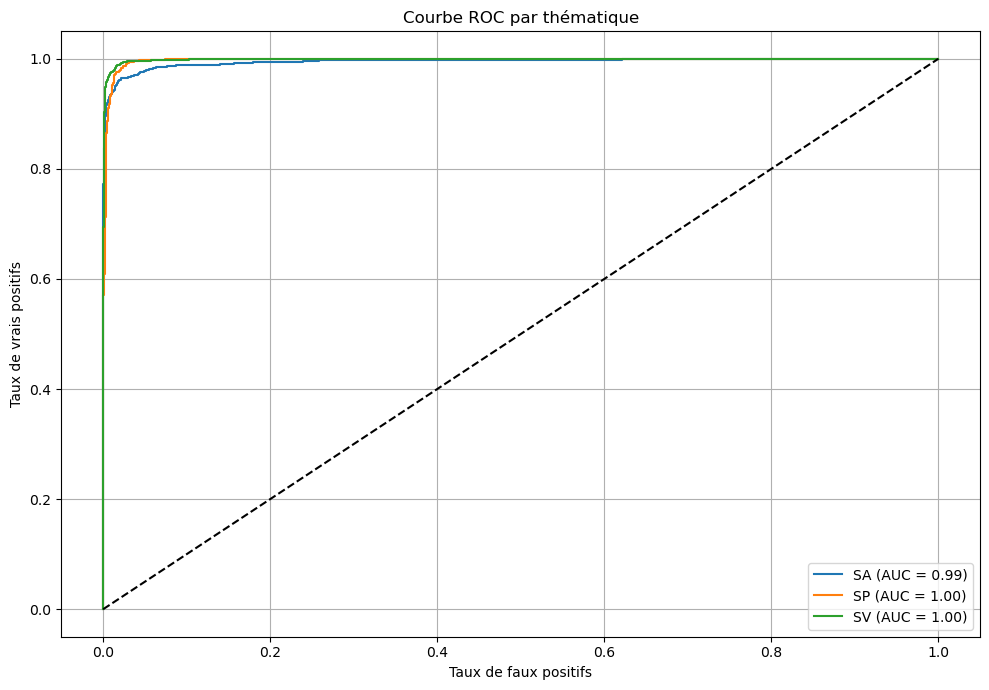

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

# Récupération des noms de classes
class_names = label_encoder.classes_

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC par thématique
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC par thématique")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### les performances sur les données sélectionnées avec umap et kmeans présente une meilleure courbe d'apprentissage, nous allons nous concentrer sur cet ensemble de données dans la suite de notre travail, et dans notre rapport parlant de l'apprentissage par transfert 